## Module Title:
Data Exploration & Preparation Programme schedules are all published on the CCT IQR Provider Profile
## Assessment Title:
L7 Data Visualization and Communication CA1 v4
## Lecturer Name:
David McQuaid
## Student Full Name:
Ricardo Cascallar
## Student Number:
sba24046

# Video Game Sales Analysis

## Introduction

This Jupyter Notebook explores video game sales data to uncover patterns in global performance, genre popularity, regional trends, and development activity.

This notebook includes:
- Data Cleaning and preparation of the dataset (`vgsales.csv`)
- Exploratory Data Analysis (EDA) to understand data types, missing values, and distributions
- Feature Selection relevant to the business questions
- Differnet visualization types (bar, pie, violin, and lollipop) to answer each question clearly


## Import Required Libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style="whitegrid")

## Load dataset

In [6]:
# Load raw dataset
df_raw = pd.read_csv("vgsales.csv")

## Exploratory Data Analysis (EDA)

In [8]:
df_raw.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [10]:
df_raw.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


In [11]:
df_raw.duplicated().sum()

0

In [12]:
df_raw.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

## Data Cleaning

Clean raw CSV into usable format for analysis.

In [14]:
# Standardize column names
df_raw.columns = df_raw.columns.str.strip().str.lower().str.replace(" ", "_")

# Convert year_of_release to numeric (handle errors)
df_raw["year_of_release"] = pd.to_numeric(df_raw["year_of_release"], errors="coerce")

df_cleaned = df_raw.copy()

# Fill missing years with 0, convert to integer
df_cleaned["year_of_release"] = df_cleaned["year_of_release"].fillna(0).astype(int)

# Create a name_with_year column for clarity in charts
df_cleaned["name_with_year"] = df_cleaned["name"] + " (" + df_cleaned["year_of_release"].astype(str) + ")"

# Show preview
df_cleaned.head()

,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating,name_with_year
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E,Wii Sports (2006)
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN,Super Mario Bros. (1985)
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E,Mario Kart Wii (2008)
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E,Wii Sports Resort (2009)
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN,Pokemon Red/Pokemon Blue (1996)


## Q.1: What are the top 5 games by global sales?

This chart shows the best-selling games globally. A horizontal bar chart was chosen for clarity and to easily compare large values.

                    name_with_year  global_sales
0                Wii Sports (2006)         82.53
1         Super Mario Bros. (1985)         40.24
2            Mario Kart Wii (2008)         35.52
3         Wii Sports Resort (2009)         32.77
4  Pokemon Red/Pokemon Blue (1996)         31.37


C:\Users\ricar\AppData\Local\Temp\ipykernel_8588\3696101569.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top5_games, x="global_sales", y="name_with_year", palette="Set2")


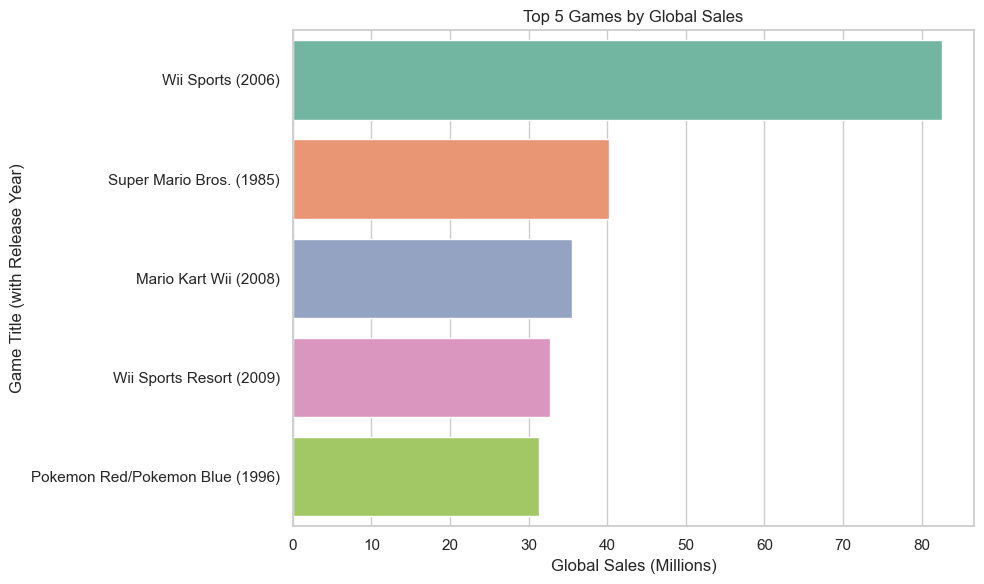

In [26]:
top5_games = df_cleaned.sort_values(by="global_sales", ascending=False).head(5)

# Show values
print(top5_games[["name_with_year", "global_sales"]])

# Bar chart
plt.figure(figsize=(10,6))
sns.barplot(data=top5_games, x="global_sales", y="name_with_year", palette="Set2")
plt.title("Top 5 Games by Global Sales")
plt.xlabel("Global Sales (Millions)")
plt.ylabel("Game Title (with Release Year)")
plt.tight_layout()
plt.show()

**Insight:** Wii Sports leads by a large margin, with global sales exceeding 80 million units.